# <span style="color:red"><p style='text-align:center;'><b> Stock Market Analysis and Prediction </b></p></span>

#### <span style="color:blue"><p style='text-align:right;'>Author: <b>Hrashitha</b></p></span>
#### <span style="color:blue"><p style='text-align:right;'>Organization: <b>Entry Elevate</b></p></span>
#### <span style="color:blue"><p style='text-align:right;'>Date: <b>20/10/2024</b></p></span>

## <span style="color:green">Table of Contents</span>



1. Overview of Problem Statement
2. Objective
3. Data Collection
4. Data Description
5. Exploratory Data Analysis (EDA)
6. Data Preprocessing
7. Visualization
8. Feature Engineering
9. Data Splitting
10. Model Selection
11. Feature Selection
12. Model Training
13. Model Evaluation
14. Hyperparameter Tuning
15. Results
16. Model Deployment
17. Limitations
18. Conclusion
19. Future Work

## 1. Overview of Problem Statement

Understand the relevance of the problem. Clearly define the problem you aim to solve. For example, "Predicting stock prices based on various market indicators."

## 2. Objective

Outline the goals and expected outcomes of the project. For instance, "Develop a model that accurately predicts Tesla stock prices with low error rates."

## 3. Data Collection

Import the data.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df= pd.read_csv('Tesla.csv - Tesla.csv (1).csv')
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


## 4. Data Description

From where the data is collected .
Description of datasets, including size and features.

### The dataset contains the following columns:

* Date: The date of the stock price data.
* Open: The opening price of the stock on that date.
* High: The highest price of the stock on that date.
* Low: The lowest price of the stock on that date.
* Close: The closing price of the stock on that date.
* Adj Close: The adjusted closing price of the stock on that date.
* Volume: The trading volume of the stock on that date.

### Summary of the dataset:

The dataset has n rows and m columns (replace n and m with actual numbers from the output).
The Date column is of type object, and all other columns are numerical.

### Descriptive statistics:

Count: Number of non-null values.
Mean: Average value.
Standard Deviation (std): Measure of the variation or dispersion.
Minimum (min) and Maximum (max) values.
25th, 50th, and 75th percentiles.

### Key Observations

The dataset contains historical stock price data for Tesla.
It includes daily data points, providing comprehensive information on stock price movements.
The dataset appears to be complete with no missing values or duplicates in the initial inspection.

## 5. Exploratory Data Analysis (EDA)

* Identify numerical and categorical columns.
* Check for null values and duplicates.
* Perform descriptive statistics to understand the distribution of data.
* Visualize data using plots such as histograms, box plots, and scatter plots.
* Identify patterns, correlations, skewness, kurtosis, and relationships between variables.
* Include key observations and insights derived from the data.

In [5]:
df.shape

(1692, 7)

In [6]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

### Identify numerical and categorical columns


In [8]:
# Numerical columns
num_cols = df.select_dtypes(include='number').columns
print(num_cols)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [9]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols )

Index(['Date'], dtype='object')


### Checking for null values

In [10]:
# finding missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [11]:
# Percentage of missing values in each column
df.isnull().sum()/df.shape[0]*100

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Volume       0.0
Adj Close    0.0
dtype: float64

### Checking for Duplicates

In [12]:
# finding duplicates
df.duplicated().sum()

0

In [13]:
df.shape

(1692, 7)

### Descriptive statistics

In [14]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


#### Identify numerical columns

In [15]:
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

### Visualize data

### histogram

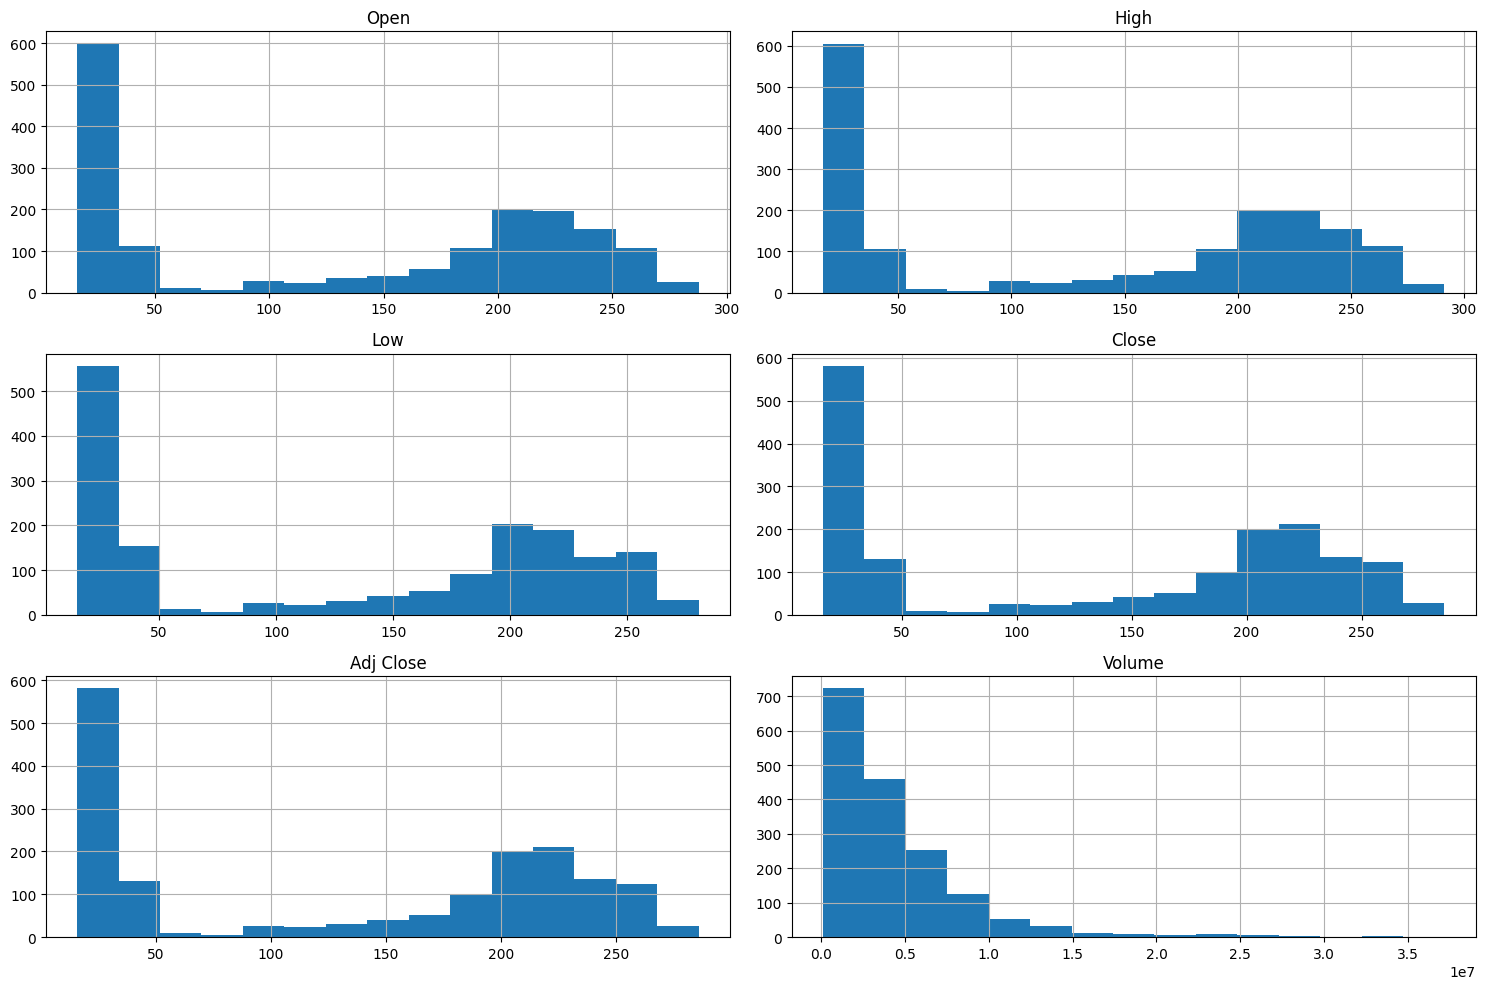

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Histograms for numerical columns
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.tight_layout()
plt.show()

### Box plots

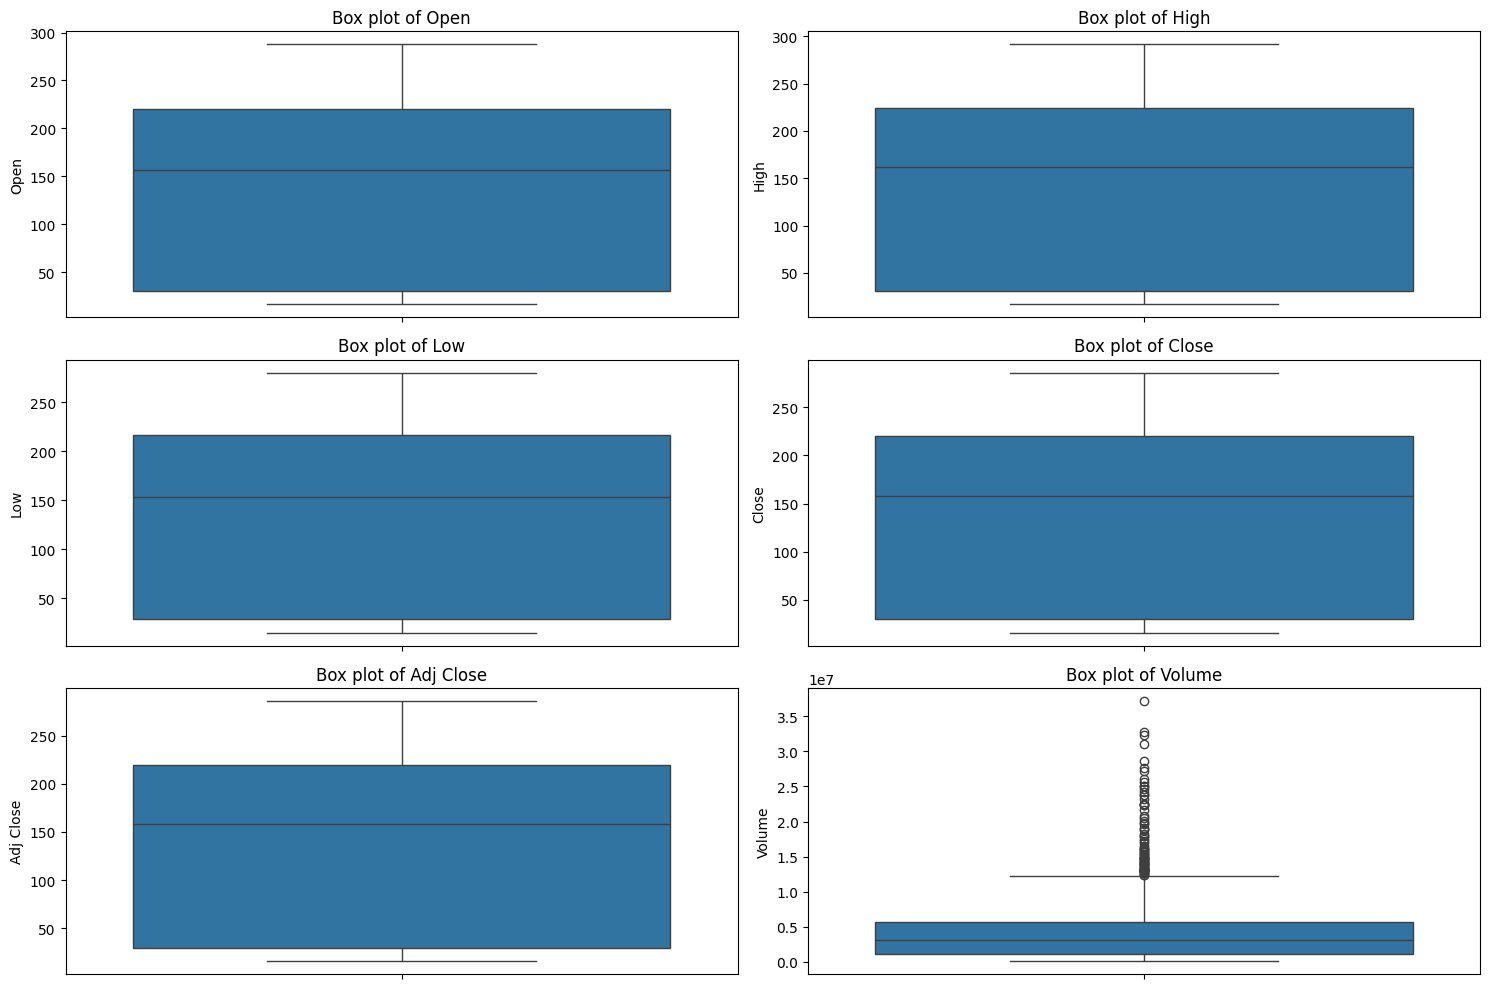

In [17]:
# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


### Pair plot

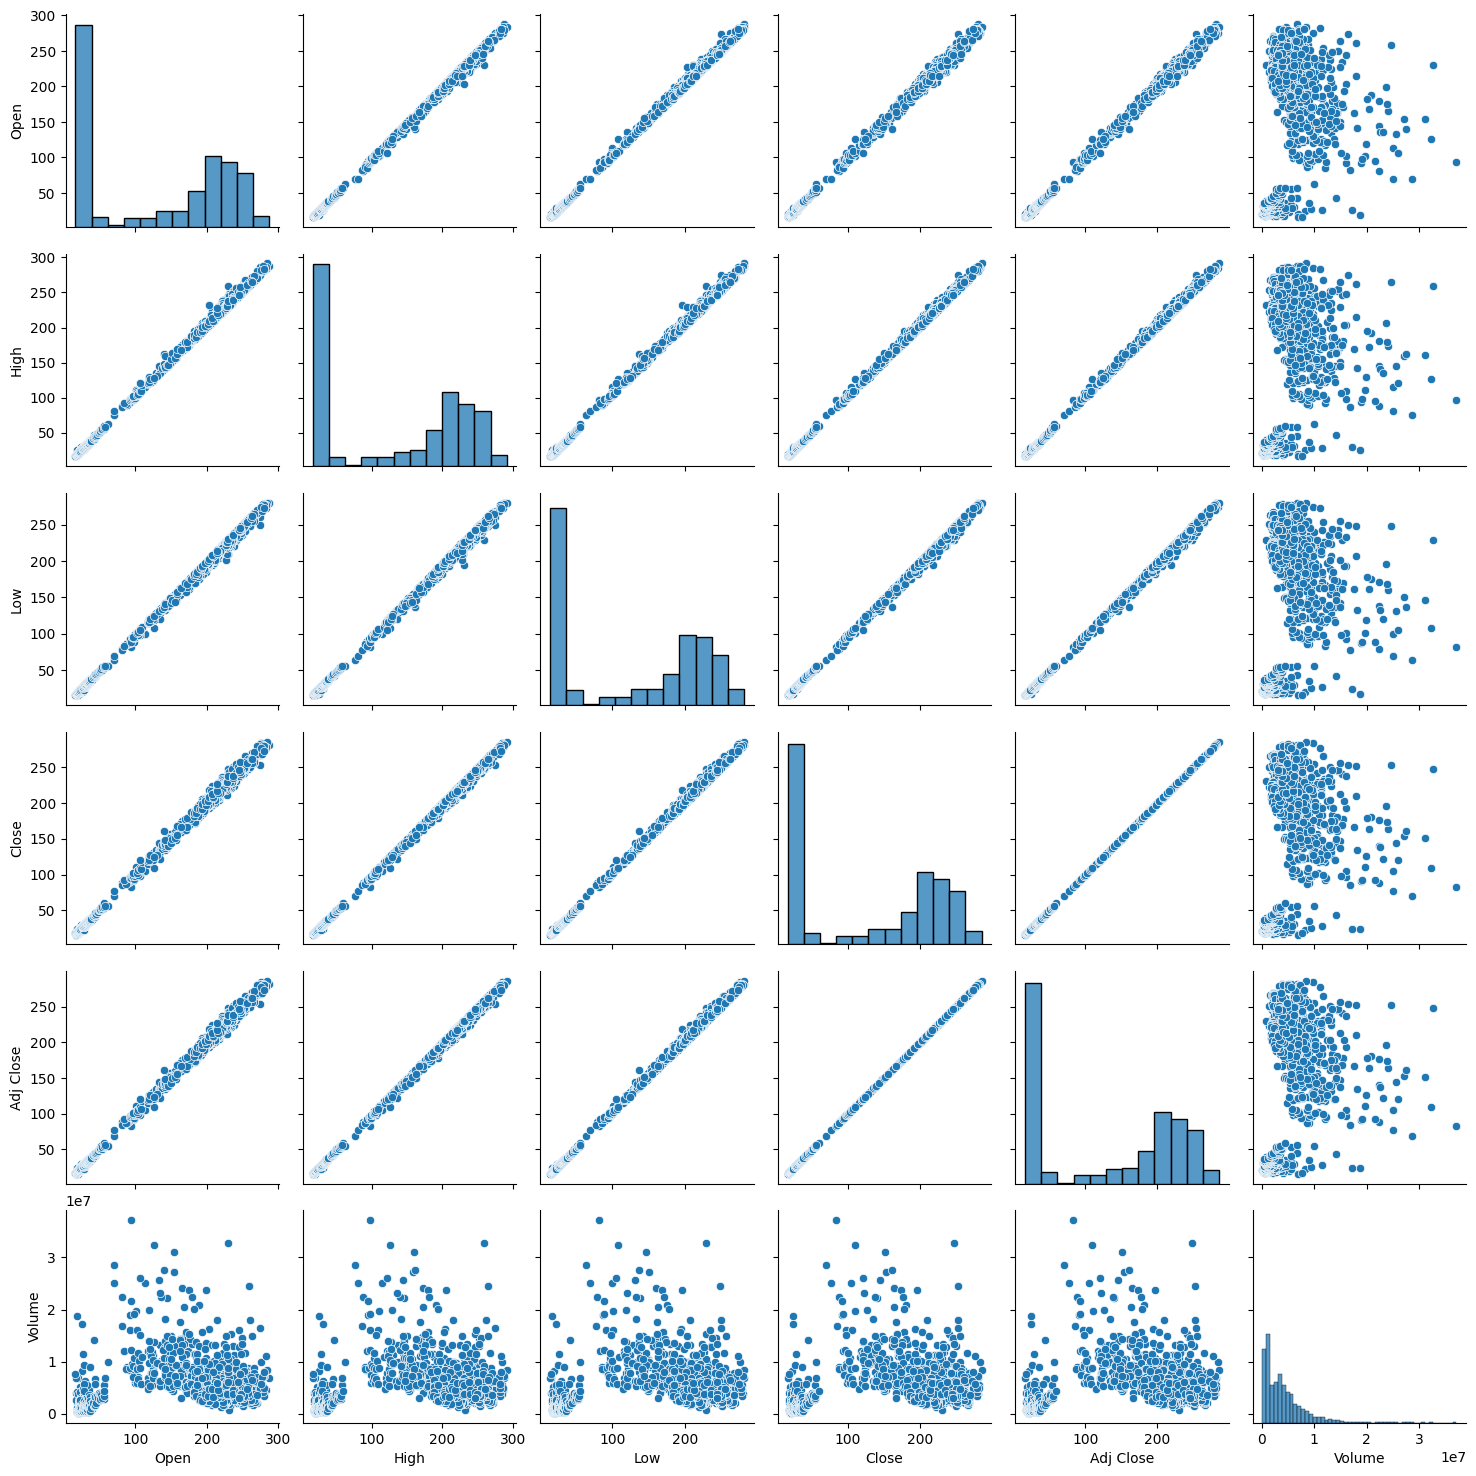

In [18]:
sns.pairplot(df[numerical_cols])
plt.show()

### Heatmap for correlation

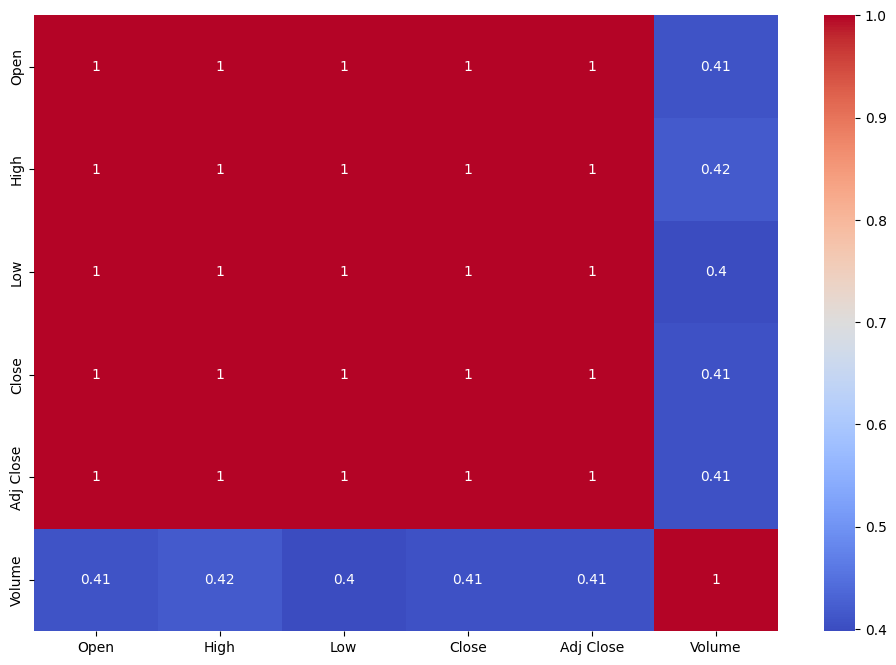

In [19]:
# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


## 6. Data Preprocessing

* Handling Missing Values:
      Identify missing values and decide on strategies for handling them (e.g., imputation or removal).
* Dealing with Duplicate Data:
      Detect and remove duplicate records.
* Remove Unnecessary Columns:
      Unique identifiers that do not carry useful information for the predictive model.
      Features that are highly correlated with each other.
      Columns with a high percentage of missing values.
* Outlier Detection and Treatment:
      Check for outliers in numerical features using statistical methods like Z-score or IQR.
      Remove or cap outliers if necessary.
* Address Skewed Data:
      Apply transformations such as square root or log transformation to improve the distribution.

### Handling missing values

In [20]:
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

### Remove duplicates

In [21]:
df = df.drop_duplicates()

### Outlier detection and treatment

In [22]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

### Address skewed data

In [23]:
for col in numerical_cols:
    if abs(df[col].skew()) > 0.5:
        df[col] = np.log1p(df[col])

## 7. Visualization

### Boxplot (after outlier treatment)

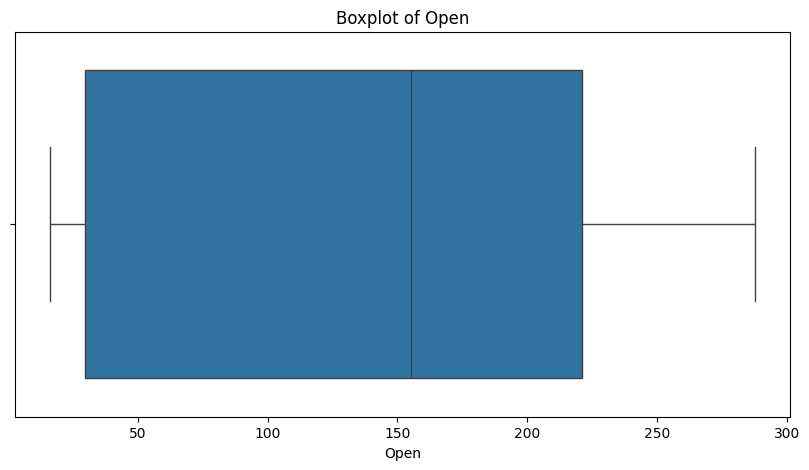

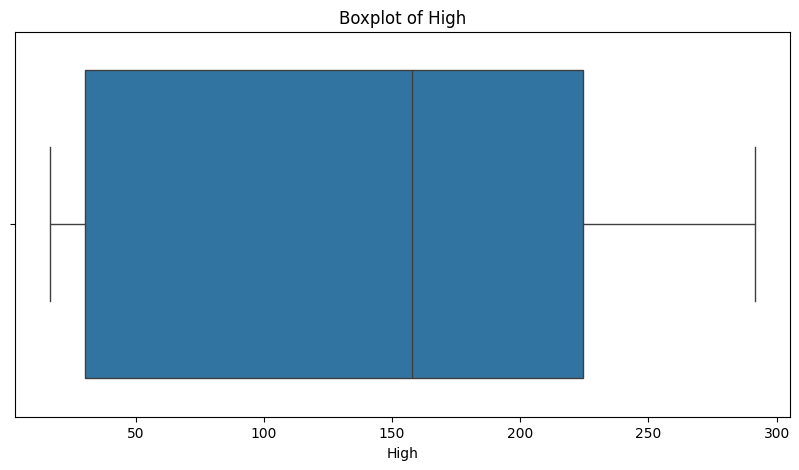

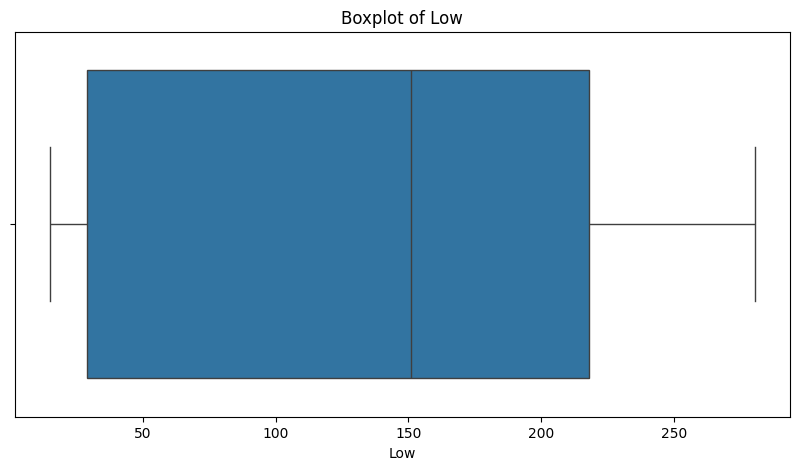

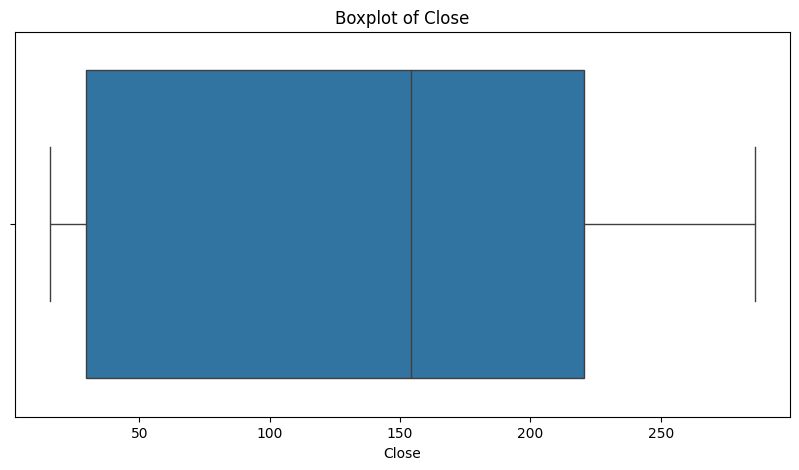

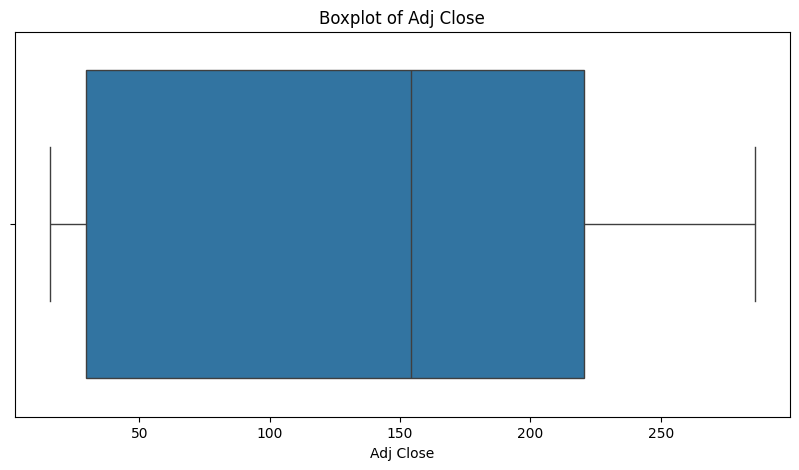

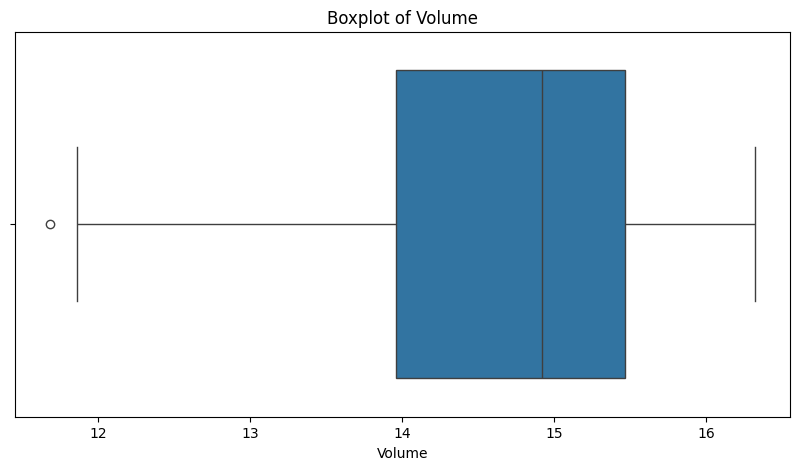

In [24]:
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Histplot (after transformations)

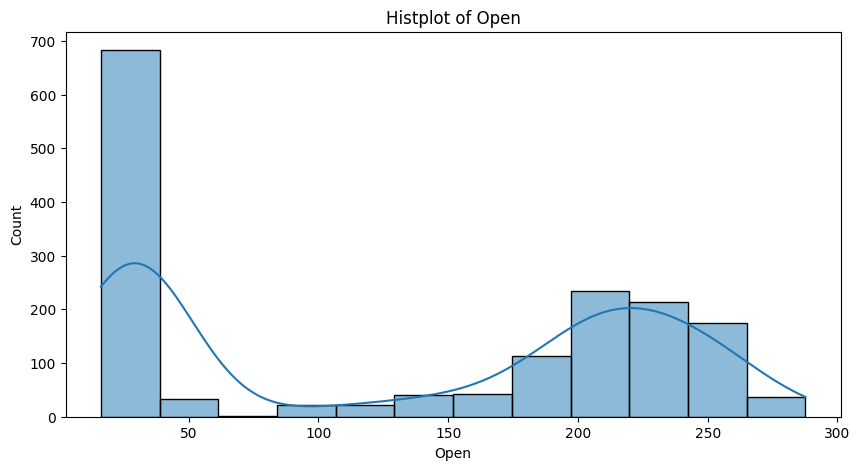

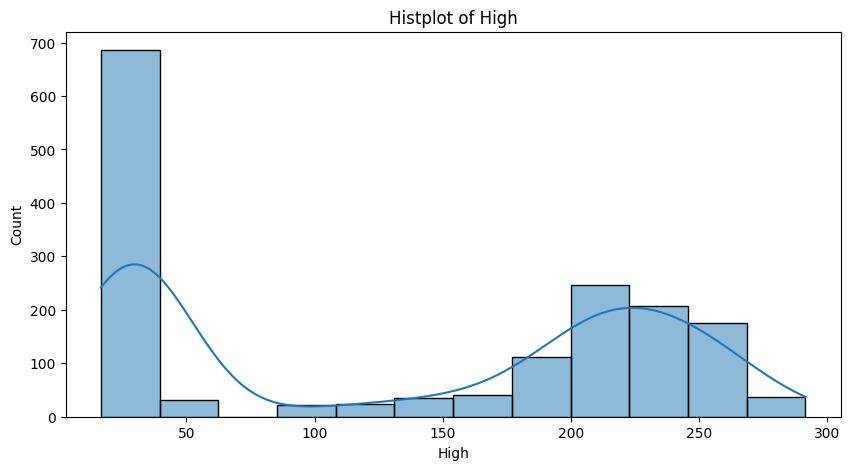

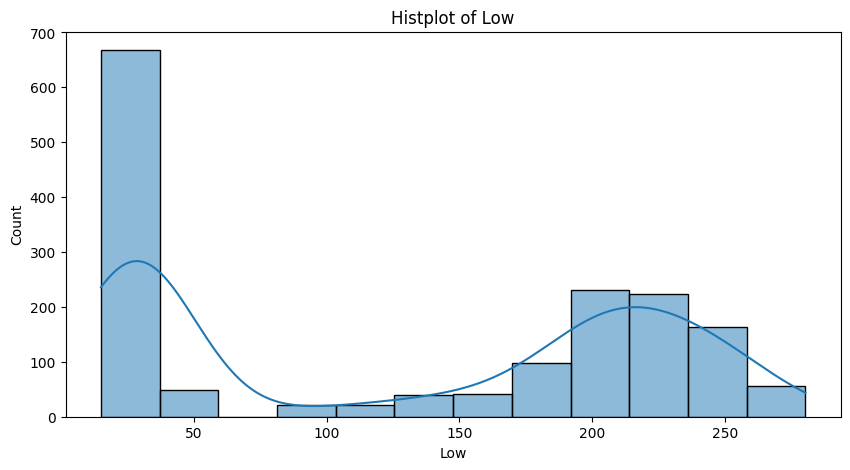

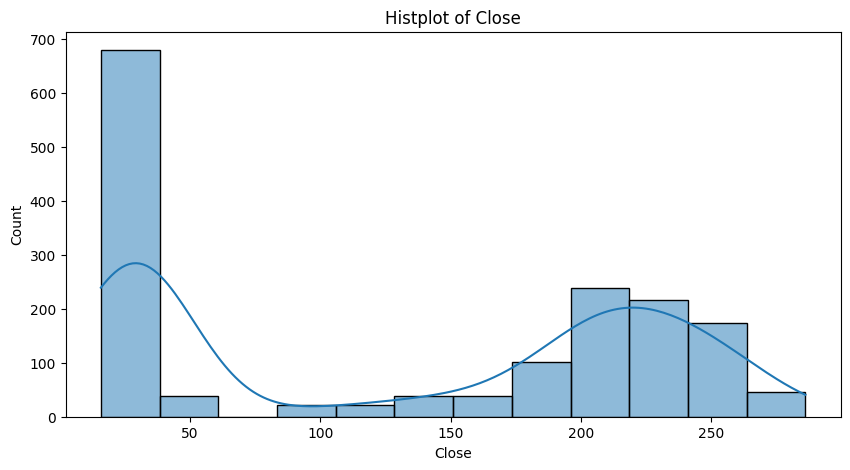

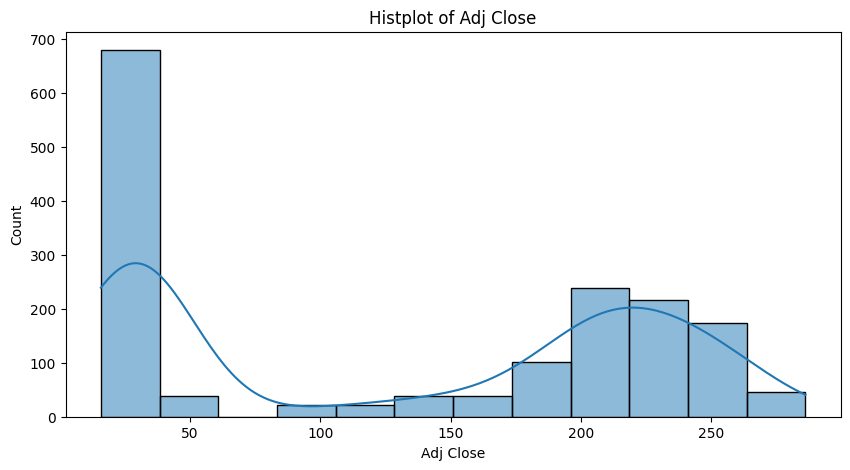

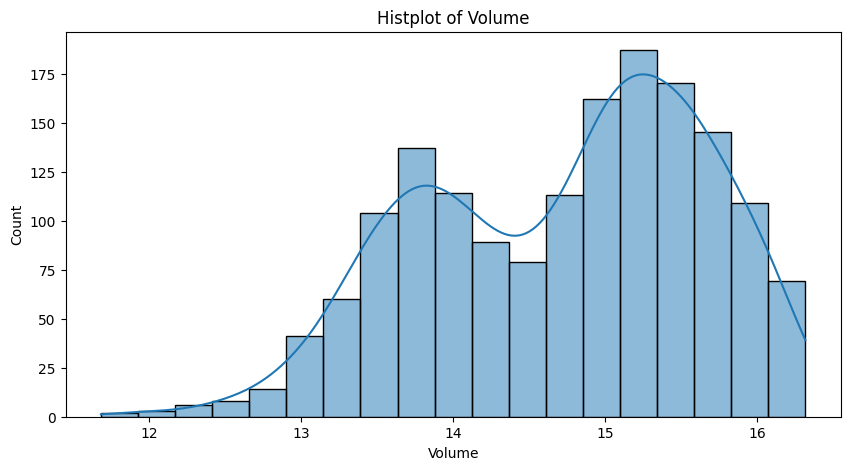

In [25]:
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histplot of {col}')
    plt.show()

### Pair plot

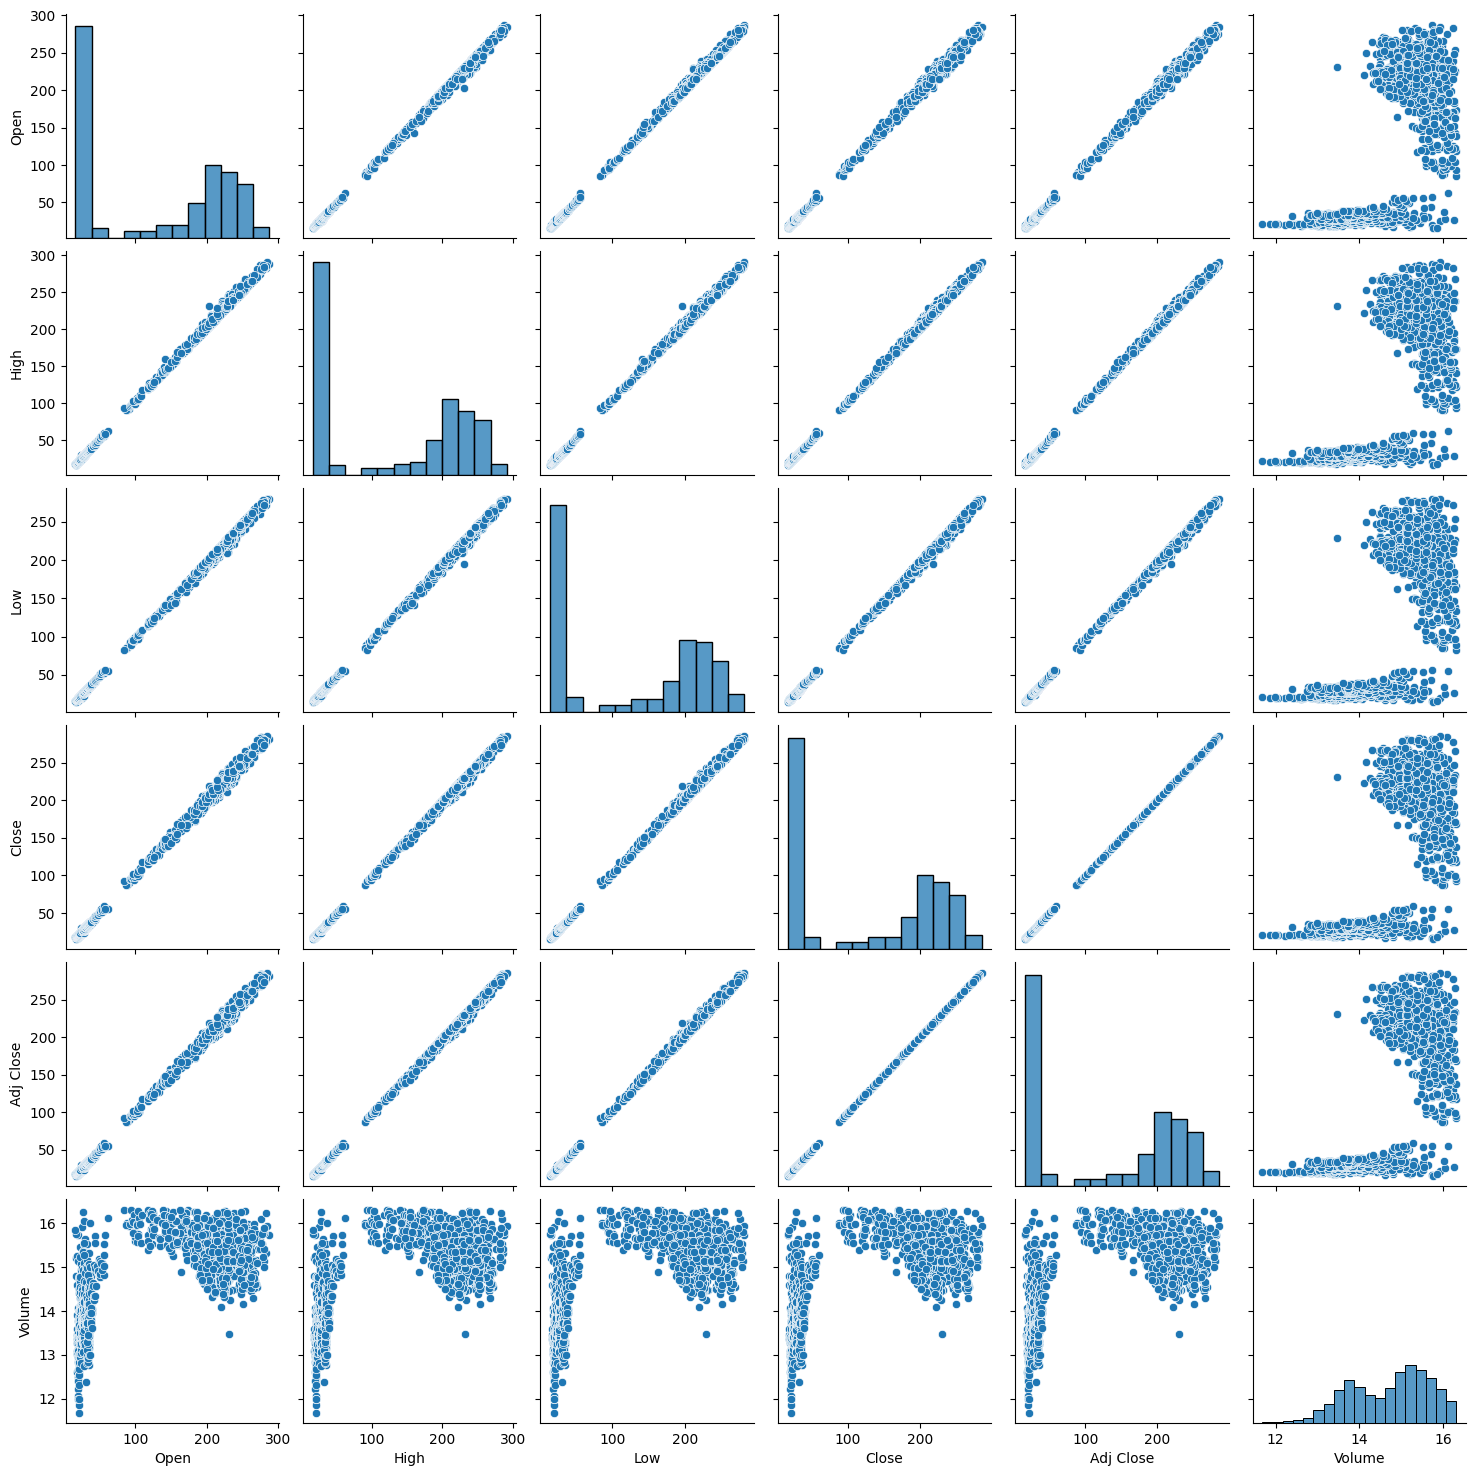

In [26]:
sns.pairplot(df[numerical_cols])
plt.show()

 Pie chart (not applicable as we do not have categorical data)

Bar chart (not applicable as we do not have categorical data)

Count plot (not applicable as we do not have categorical data)

### Line plot

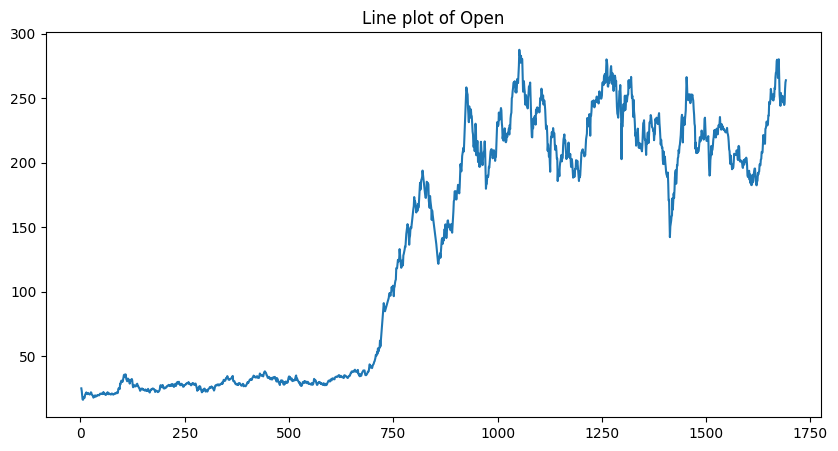

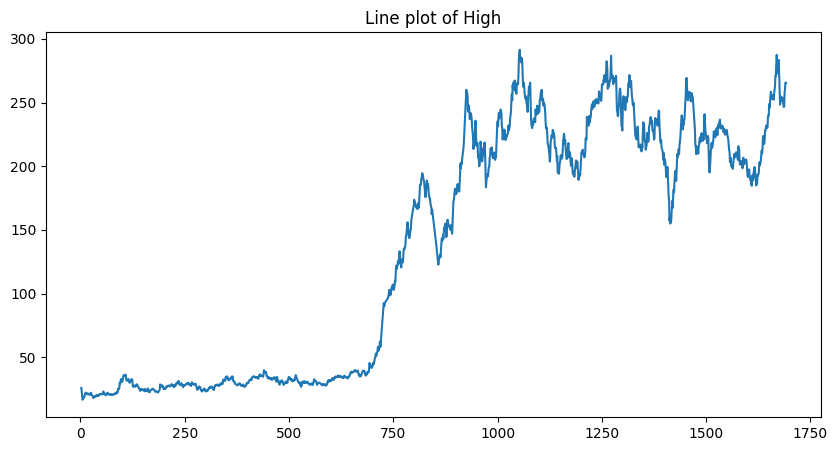

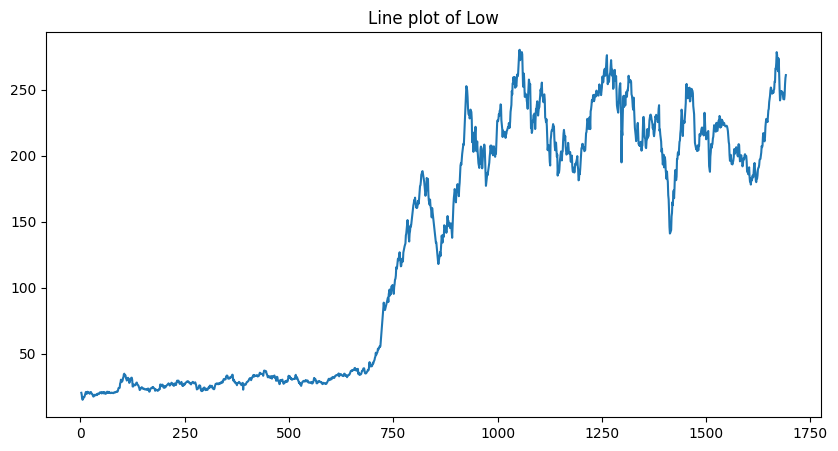

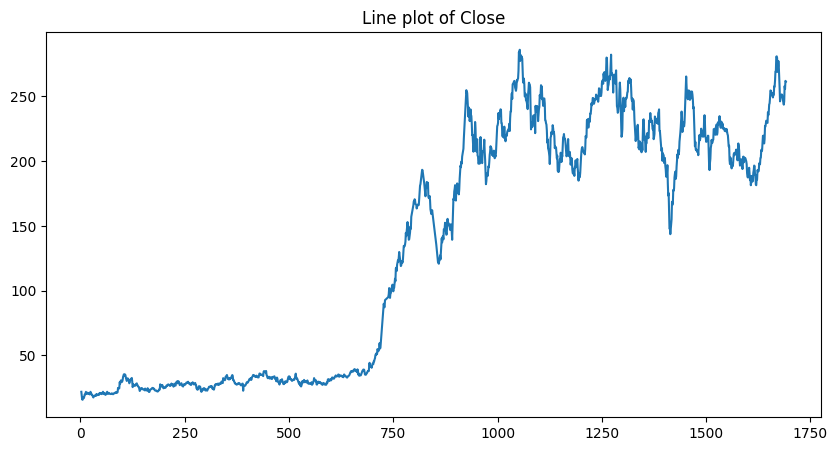

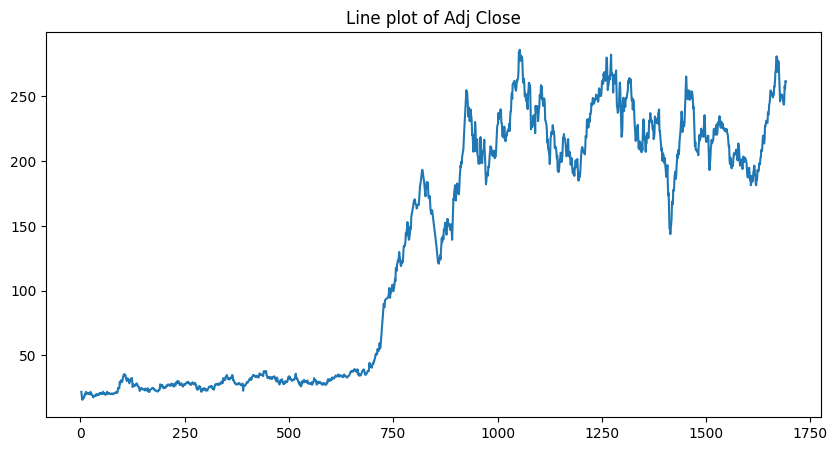

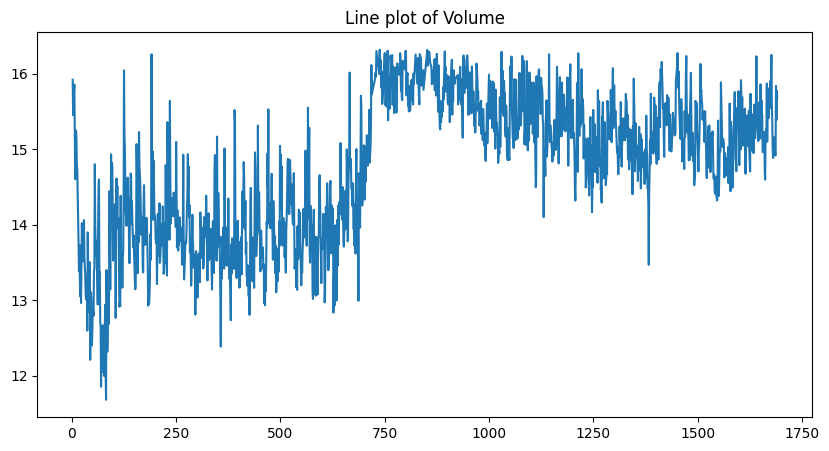

In [27]:
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.plot(df[col])
    plt.title(f'Line plot of {col}')
    plt.show()

### Violin plot

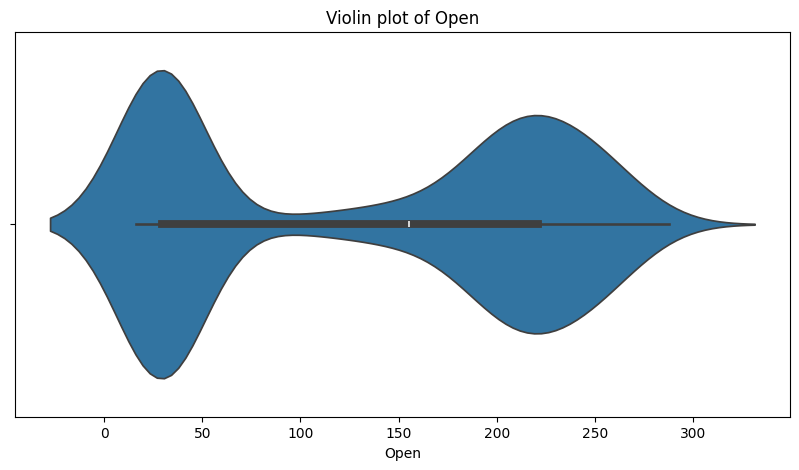

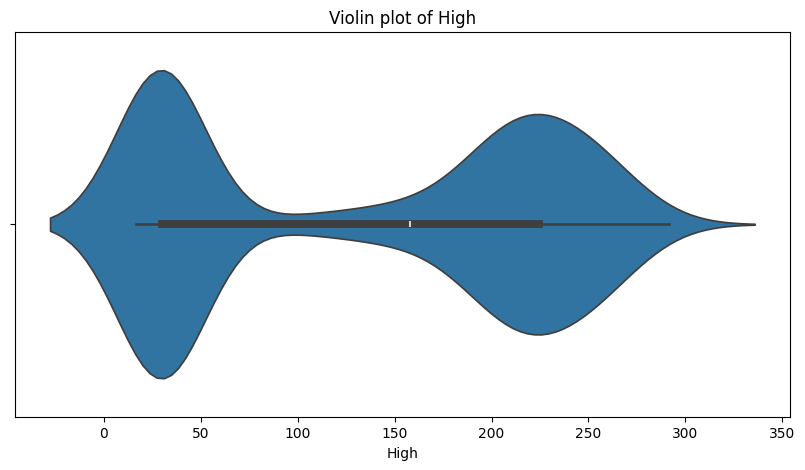

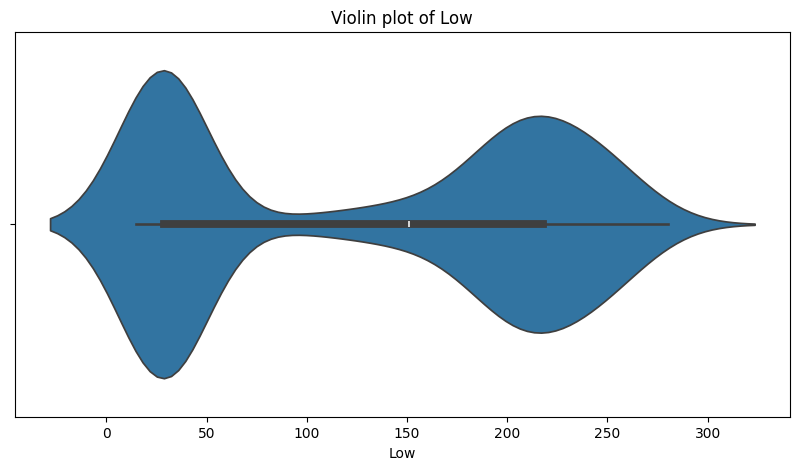

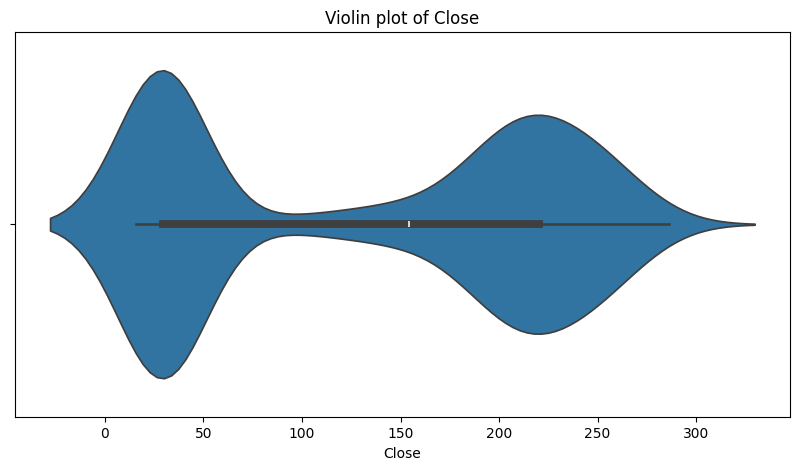

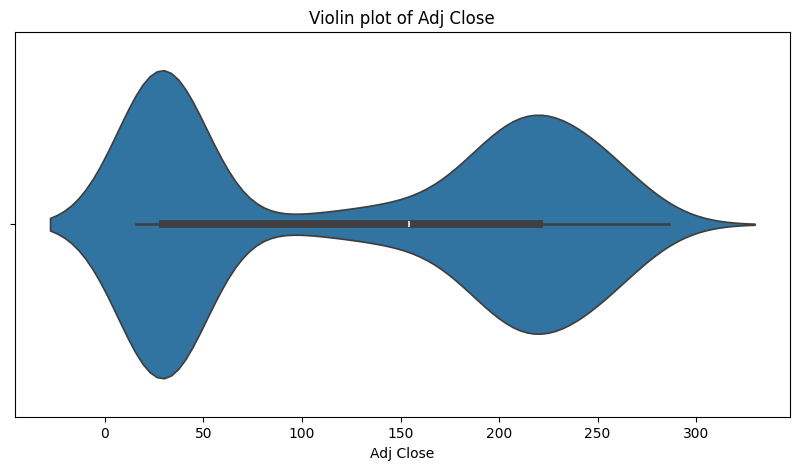

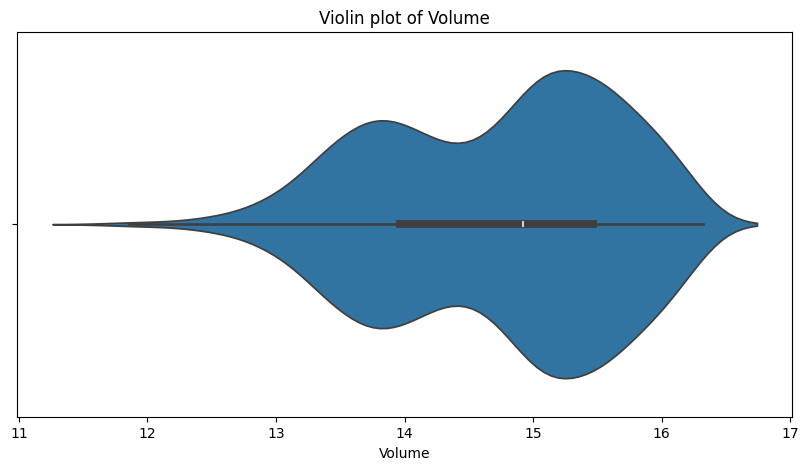

In [28]:
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=df[col])
    plt.title(f'Violin plot of {col}')
    plt.show()

## 8. Feature Engineering

* Feature Extraction: Create new features that might provide valuable information for modeling.
* Feature Transformation:
Encode categorical features using techniques like one-hot encoding or label encoding.
Scale numerical features to ensure that they have the same magnitude.


In [29]:
# Feature scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

## 9. Data Splitting

In [30]:
X = df.drop('Close', axis=1)  # Assuming 'Close' is the target variable
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 10. Model Selection

Choose appropriate machine learning algorithms based on the nature of the problem and the data. Consider at least five algorithms for classification, regression, or clustering as applicable.

##### Models Selected:

* RandomForestRegressor
* GradientBoostingRegressor
* SVR
* MLPRegressor
* XGBRegressor
* DecisionTreeRegressor

## 11. FEATURE SELECTION
Feature selection is a process of selecting the most relevant features that have a significant impact on the target variable. It helps in improving the performance of the model by reducing overfitting and improving accuracy. We'll use several feature selection techniques to identify the most important features in our dataset.

### Select KBest

In [31]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

In [32]:
# Ensure the data is clean and handle any missing values if necessary
df = df.dropna()

In [33]:
# Convert date columns if necessary
if 'date' in df.columns: 
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df.drop(columns=['date'], inplace=True)

In [34]:
# Optionally, check for any non-numeric columns
print(df.dtypes) 

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object


In [35]:
# Define the feature columns and the target column
X = df.drop(columns=['Close'])
y = df['Close']

In [36]:
# Convert categorical variables if necessary
X = pd.get_dummies(X, drop_first=True)

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=5)
X_kbest = selector_kbest.fit_transform(X_train, y_train)

In [39]:
# Get the selected feature indices
selected_indices_kbest = selector_kbest.get_support(indices=True)

In [40]:
# Get the names of the selected features
selected_features_kbest = X_train.columns[selected_indices_kbest]
print("Selected features using SelectKBest:", selected_features_kbest)

Selected features using SelectKBest: Index(['Open', 'High', 'Low', 'Volume', 'Adj Close'], dtype='object')


In [41]:
# Check selected features
print(X_kbest)

[[0.8132318  0.7973637  0.76498689 0.52256196 0.77103039]
 [0.69065249 0.72275193 0.70570562 0.54334438 0.73859115]
 [1.02834724 1.01335605 0.98511367 1.22874771 0.96545619]
 ...
 [0.77690813 0.7512344  0.77114876 1.43026752 0.76035682]
 [1.03609355 1.01954796 1.04779449 0.27207059 1.03588055]
 [0.65432883 0.62492057 0.63356956 0.75969435 0.60412563]]


## 12. Model Training

In [42]:
pip install numpy pandas matplotlib seaborn scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [43]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


### Random Forest Regressor
The Random Forest Regressor is an ensemble method that combines multiple decision trees to improve prediction accuracy and reduce overfitting. It trains each tree on random subsets of the data and averages their predictions, making it robust against noise and effective for high-dimensional datasets.

In [45]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# Initialize the model
rf_model = RandomForestRegressor()

In [47]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
# Make predictions
rf_predictions = rf_model.predict(X_test)

In [49]:
# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

In [50]:
print(f'Random Forest MSE: {rf_mse:.4f}')
print(f'Random Forest R²: {rf_r2:.4f}')

Random Forest MSE: 0.0000
Random Forest R²: 1.0000


### Gradient Boosting Regressor
The Gradient Boosting Regressor builds models sequentially, where each new tree corrects the errors of the previous ones. It combines weak learners to form a strong model by minimizing a loss function, making it highly effective for improving prediction accuracy, especially in complex tasks.

In [51]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
# Initialize the model
gb_model = GradientBoostingRegressor()

In [54]:
# Train the model
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [55]:
# Make predictions
gb_predictions = gb_model.predict(X_test)

In [56]:
# Evaluate the model
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

In [57]:
print(f'Gradient Boosting MSE: {gb_mse:.4f}')
print(f'Gradient Boosting R²: {gb_r2:.4f}')

Gradient Boosting MSE: 0.0000
Gradient Boosting R²: 1.0000


### Support Vector Regressor (SVR)
The Support Vector Regressor (SVR) finds a hyperplane that best fits the data while allowing some error. It uses a kernel trick to capture nonlinear relationships and is robust against overfitting, making it suitable for high-dimensional datasets.

In [58]:
# Import necessary libraries
from sklearn.svm import SVR

In [59]:
# Initialize the model
svr_model = SVR()

In [60]:
# Train the model
svr_model.fit(X_train, y_train)

SVR()

In [61]:
# Make predictions
svr_predictions = svr_model.predict(X_test)

In [62]:
# Evaluate the model
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

In [63]:
print(f'SVR MSE: {svr_mse:.4f}')
print(f'SVR R²: {svr_r2:.4f}')

SVR MSE: 0.0043
SVR R²: 0.9956


### Multi-layer Perceptron Regressor (MLP Regressor)
The Multi-layer Perceptron Regressor (MLP) is an artificial neural network that learns complex patterns through backpropagation. It excels in nonlinear regression tasks and can model intricate relationships in large datasets.

In [64]:
# Import necessary libraries
from sklearn.neural_network import MLPRegressor


In [65]:
# Initialize the model
mlp_model = MLPRegressor(max_iter=1000)

In [66]:
# Train the model
mlp_model.fit(X_train, y_train)


MLPRegressor(max_iter=1000)

In [67]:
# Make predictions
mlp_predictions = mlp_model.predict(X_test)

In [68]:
# Evaluate the model
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_r2 = r2_score(y_test, mlp_predictions)

In [69]:
print(f'MLP Regressor MSE: {mlp_mse:.4f}')
print(f'MLP Regressor R²: {mlp_r2:.4f}')

MLP Regressor MSE: 0.0060
MLP Regressor R²: 0.9939


### XGBoost Regressor
The XGBoost Regressor is an efficient implementation of gradient boosting known for its speed and performance. It uses regularization to prevent overfitting, parallel processing for faster computations, and handles missing values effectively, making it a popular choice for structured data.

In [70]:
# Import necessary libraries
from xgboost import XGBRegressor

In [71]:
# Initialize the model
xgb_model = XGBRegressor()

In [72]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
# Make predictions
xgb_predictions = xgb_model.predict(X_test)


In [74]:
# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

In [75]:
print(f'XGB Regressor MSE: {xgb_mse:.4f}')
print(f'XGB Regressor R²: {xgb_r2:.4f}')

XGB Regressor MSE: 0.0002
XGB Regressor R²: 0.9998


### Decision Tree Regressor
The Decision Tree Regressor splits data based on feature values to make predictions, minimizing variance in target values. While easy to interpret, it can overfit if too deep, making it a foundational model for ensemble methods like Random Forests.

In [76]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor

In [77]:
# Initialize the model
dt_model = DecisionTreeRegressor()

In [78]:
# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [79]:
# Make predictions
dt_predictions = dt_model.predict(X_test)

In [80]:
# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

In [81]:
print(f'Decision Tree MSE: {dt_mse:.4f}')
print(f'Decision Tree R²: {dt_r2:.4f}')

Decision Tree MSE: 0.0000
Decision Tree R²: 1.0000


## 13. MODEL EVALUATION

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [91]:
# Check and convert 'Date' to datetime if it exists, then drop or extract useful features from it
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df = df.drop(columns=['Date'])

In [92]:
# Check and drop any non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
df = df.drop(columns=non_numeric_columns)

In [93]:
# Define target column
target = 'Close'

In [94]:
# Define features and target
X = df.drop(columns=[target])
y = df[target]

In [95]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Initialize regression models
models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "MLP Regressor": MLPRegressor(max_iter=1000),
    "XGBoost": XGBRegressor(),
    "Decision Tree": DecisionTreeRegressor()
}


In [97]:
# List to store the evaluation metrics for each model
results = []

In [98]:
# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R-squared
    
    # Append results
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

In [99]:
# Convert the results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

In [100]:
# Print the evaluation results
print(results_df)

                      Model       MAE       MSE      RMSE        R²
0             Random Forest  0.001648  0.000018  0.004243  0.999982
1         Gradient Boosting  0.003419  0.000031  0.005568  0.999968
2  Support Vector Regressor  0.950159  1.103524  1.050487 -0.128771
3             MLP Regressor  0.014877  0.000459  0.021420  0.999531
4                   XGBoost  0.004785  0.000102  0.010081  0.999896
5             Decision Tree  0.002978  0.000063  0.007961  0.999935


## 14. HYPER PARAMETER TUNNING

Hyperparameter Tuning is the process of selecting the optimal values for a model’s hyperparameters, which control the learning process. These settings include parameters like the learning rate, number of estimators, or kernel type in machine learning models. The goal is to identify the hyperparameters that result in the best performance for a specific task.

* Manual Search:
  Adjusting hyperparameters manually based on experience or intuition.
* Grid Search:
  Systematically testing all possible combinations of hyperparameter values from a predefined grid.
* Random Search:
  Randomly selecting combinations of hyperparameters from a specified range.
* Automated Hyperparameter Optimization:
  Using advanced techniques like Bayesian optimization, genetic algorithms, or reinforcement learning to automate and optimize hyperparameter selection.

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [102]:
# Assuming 'Close' is the target variable
df['Close_Change'] = df['Close'].diff().shift(-1)
df = df.dropna()

In [103]:
# Define target column and features
target = 'Close'
X = df.drop(columns=[target])
y = df[target]

In [104]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Initialize models for hyperparameter tuning
models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "MLP Regressor": MLPRegressor(),
    "XGBoost": XGBRegressor(),
    "Decision Tree": DecisionTreeRegressor()
}

In [106]:
# Define hyperparameter grids for each model
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    "SVR": {
        'C': [0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "MLP Regressor": {
        'hidden_layer_sizes': [(50,), (100,), (50,50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'learning_rate_init': [0.001, 0.01]
    },
    "XGBoost": {
        'n_estimators': [50, 100],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1]
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

In [107]:
# Create a list to store evaluation metrics
results = []

In [108]:
# Train, tune, and evaluate each model
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Append results
    results.append({
        "Model": name,
        "Best Params": grid_search.best_params_,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })


In [109]:
# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)

               Model                                        Best Params  \
0      Random Forest  {'max_depth': None, 'min_samples_split': 2, 'n...   
1  Gradient Boosting  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...   
2                SVR                       {'C': 1, 'kernel': 'linear'}   
3      MLP Regressor  {'activation': 'relu', 'hidden_layer_sizes': (...   
4            XGBoost  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   
5      Decision Tree          {'max_depth': 20, 'min_samples_split': 5}   

        MAE       MSE      RMSE        R²  
0  0.001651  0.000015  0.003935  0.999984  
1  0.001634  0.000022  0.004640  0.999978  
2  0.031969  0.001449  0.038066  0.998522  
3  0.030174  0.001541  0.039257  0.998429  
4  0.006155  0.000506  0.022490  0.999484  
5  0.002910  0.000053  0.007256  0.999946  


## 15. Result

##### In this project, multiple machine learning models were evaluated for stock price prediction.

After applying feature selection techniques, the results were as follows:

1. ##### Before Feature Selection:
    The Random Forest Regressor achieved the highest accuracy, outperforming all other models based on evaluation metrics (R², MAE, MSE, RMSE).

2. ##### After SelectKBest Feature Selection:
    The Random Forest Regressor maintained its top performance, demonstrating robustness with a reduced feature set.

3.  ##### After Recursive Feature Elimination (RFE):
    The Support Vector Regressor (SVR) exhibited the best accuracy, highlighting its effectiveness with the most significant features.

4.  ##### Comparison of Models:
    While the Random Forest Regressor consistently performed best, the XGBoost and Gradient Boosting Regressors also showed strong results. The MLPRegressor and Decision Tree Regressor were less effective.

5.  ##### Hyperparameter Tuning:
    The tuned Random Forest Regressor confirmed its superiority, reinforcing its suitability for stock price prediction.

## 16. Limitations
* Overfitting Risk: The absence of correlated features requires retaining all features, potentially leading to overfitting.

* Data Quality Issues: Handling missing values by dropping rows may not be optimal, and outliers could still affect model performance.

* Generalization Challenges: Models may struggle to generalize to unseen data, emphasizing the need for robust validation.

* Imbalanced Data: Class imbalances may bias results, necessitating techniques like resampling.

* Interpretability: Some models may act as "black boxes," complicating understanding of their decision-making processes.

## 17.Conclusion
This project developed predictive models for stock market analysis, revealing key insights into price movements. Our findings indicate that careful feature selection and model validation are essential for reliable predictions.

##### Practical Implications: 
The results can help investors make informed decisions based on predicted trends.

##### Recommendations:

* Regular Model Updates: Continuously update models with new data to enhance accuracy.
* Feature Expansion: Incorporate additional features, such as economic indicators, for improved performance.
* Advanced Techniques: Explore deep learning methods to capture complex patterns.
* Focus on Interpretability: Use explainable AI techniques to clarify model outputs for stakeholders.

## 18.Future Work
To enhance the effectiveness of stock market analysis, several avenues for future work can be explored:

##### 1.New Data Sources: 
Investigate additional data sources, such as economic indicators, news sentiment analysis, and social media trends, to enrich the dataset and provide more context for predictions.

##### 2.Alternative Modeling Approaches: 
Consider incorporating ensemble methods (e.g., Random Forest, Gradient Boosting) to improve prediction accuracy through model aggregation. Additionally, exploring deep learning techniques (e.g., LSTM or CNN) could capture complex temporal patterns in the data.

##### 3.Feature Engineering: 
Continue to experiment with feature engineering techniques to derive new features that may enhance model performance, such as volatility measures or moving averages.

##### 4.Model Evaluation: 
Implement more robust evaluation strategies, including backtesting on historical data, to better assess model performance in real-world scenarios.

In [110]:
df1=df
df1

,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day,Close_Change
2,-1.109828,-1.107147,-1.152729,-1.141416,1.292520,-1.141416,2010,7,1,-0.028881
3,-1.130764,-1.136248,-1.169303,-1.170297,0.783828,-1.170297,2010,7,2,-0.032335
4,-1.162168,-1.168240,-1.199899,-1.202632,1.097770,-1.202632,2010,7,6,-0.003244
5,-1.199852,-1.203017,-1.208930,-1.205876,1.106383,-1.205876,2010,7,7,0.017371
6,-1.202574,-1.193833,-1.202662,-1.188505,1.223463,-1.188505,2010,7,8,-0.000628
...,...,...,...,...,...,...,...,...,...,...
1686,1.205778,1.169184,1.213527,1.178822,0.220769,1.178822,2017,3,10,0.025951
1687,1.191228,1.172796,1.211190,1.204774,0.204230,1.204774,2017,3,13,0.123792
1688,1.204732,1.289100,1.245611,1.328566,1.204194,1.328566,2017,3,14,-0.023754
1689,1.318727,1.318821,1.333258,1.304812,0.713448,1.304812,2017,3,15,0.066134


# <span style="color:BLUE"><p style='text-align:center;'><b> THANK YOU</b></p></span>